# 1. Importing functions:

In [1]:
import jax
from jax import config
import jax.numpy as jnp

### Restricting the usage to the CPU
jax.config.update('jax_default_device', jax.devices('cpu')[0])

# # JAX supports single-precisions numbers by default.For double precision, use:
# # https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html
config.update("jax_enable_x64", True)

# 2. Running simulations:

In [8]:
from functions_perturbation_theory_complex import (qfi_coherent, qfi_single)
### Parameters:
avg_num_phot =3.37

### Width of the pulse
twidth_vals = jnp.linspace(0.0016,200.0,200)

detuning=1.17
####################################################################################
### QFI obtained from the perturbation theory:
qfi_coherent_vec =jax.vmap(qfi_coherent, in_axes=(0,None, None))
(qfi2_coherent_vals, qfi4_coherent_vals)= qfi_coherent_vec(twidth_vals, avg_num_phot, detuning)

### QFI obtained from the single-photon calculations:
qfi_single_vec =jax.vmap(qfi_single, in_axes=(0,None))
(qfi2_single_vals, qfi4_single_vals) = qfi_single_vec(twidth_vals, detuning)

print(qfi2_coherent_vals[-1])
print(qfi2_single_vals[-1])

[2.1257493]
[2.1257493]


### 2a. Checking if the QFI of single-photon pulse overlaps with the perturbation theory of coherent state:

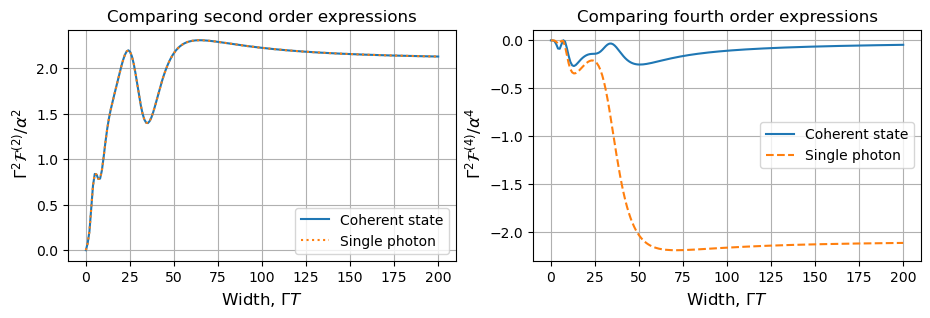

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 3))

ax[0].plot(twidth_vals, qfi2_coherent_vals, ls='-', label='Coherent state')
ax[0].plot(twidth_vals, qfi2_single_vals, ls=':', label='Single photon')
ax[0].grid(True)
ax[0].legend(loc='lower right')
ax[0].set_ylabel(r" $\Gamma^{2} \mathcal{F}^{(2)}/\alpha^{2}$", size=12)
ax[0].set_xlabel(r"Width, $\Gamma T$", size=12)
ax[0].set_title("Comparing second order expressions")

ax[1].plot(twidth_vals, qfi4_coherent_vals/avg_num_phot, ls='-', label='Coherent state')
ax[1].plot(twidth_vals, qfi4_single_vals, ls='--', label='Single photon')
ax[1].legend(loc='center right')
ax[1].set_ylabel(r" $\Gamma^{2} \mathcal{F}^{(4)}/\alpha^{4}$", size=12)
ax[1].set_xlabel(r"Width, $\Gamma T$", size=12)
ax[1].grid(True)
ax[1].set_title("Comparing fourth order expressions")
plt.show()